In [1]:
import torch

In [2]:
# path = "output/hypernerf2/broom/point_cloud/iteration_14000/deformation.pth"
path = "output/dnerf_tv/bouncingballs/point_cloud/iteration_20000/deformation.pth"

# path = "output/dynerf_emptyvoxel1/cut_roasted_beef/point_cloud/iteration_14000/deformation.pth"

In [3]:
data = torch.load(path)

In [39]:
import torch
import matplotlib.pyplot as plt
def visualize_tensor(tensor):
    # 假设 batch size 为 1，移除 batch 维度
    tensor = tensor.squeeze(0)

    # 确保有 16 个通道

    # 设置画布大小
    plt.figure(figsize=(15, 15))
    for i in range(tensor.size(0)):
        plt.subplot(4, 8, i+1)
        plt.imshow(tensor[i], cmap='gray')
        plt.axis('off')
    plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.1, hspace=0.1)
    plt.show()


In [40]:
grid_value = {}
for grid_id1 in range(3):
    for grid_id2 in range(6):
        grid_value[f"grid{grid_id1}{grid_id2}"] = data[f'deformation_net.grid.grids.{grid_id1}.{grid_id2}']
        print(f"grid{grid_id1}{grid_id2}",data[f'deformation_net.grid.grids.{grid_id1}.{grid_id2}'].shape)

grid00 torch.Size([1, 32, 64, 64])
grid01 torch.Size([1, 32, 64, 64])
grid02 torch.Size([1, 32, 75, 64])
grid03 torch.Size([1, 32, 64, 64])
grid04 torch.Size([1, 32, 75, 64])
grid05 torch.Size([1, 32, 75, 64])
grid10 torch.Size([1, 32, 128, 128])
grid11 torch.Size([1, 32, 128, 128])
grid12 torch.Size([1, 32, 75, 128])
grid13 torch.Size([1, 32, 128, 128])
grid14 torch.Size([1, 32, 75, 128])
grid15 torch.Size([1, 32, 75, 128])
grid20 torch.Size([1, 32, 256, 256])
grid21 torch.Size([1, 32, 256, 256])
grid22 torch.Size([1, 32, 75, 256])
grid23 torch.Size([1, 32, 256, 256])
grid24 torch.Size([1, 32, 75, 256])
grid25 torch.Size([1, 32, 75, 256])


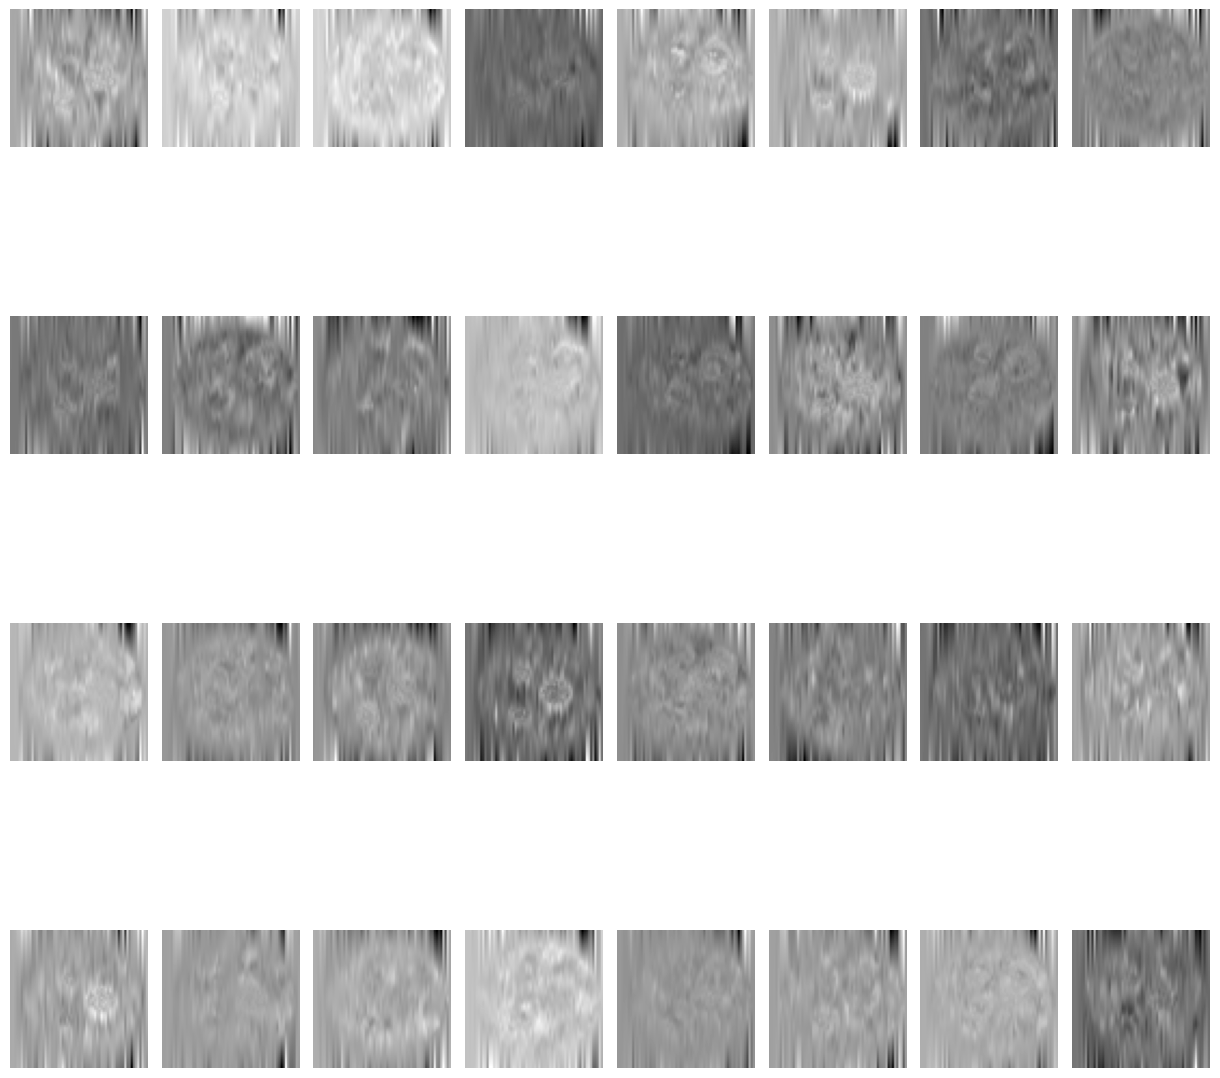

In [41]:
visualize_tensor(grid_value[f"grid00"].cpu())

In [8]:


# 假设 tensor 是你的 [1, 16, 64, 64] 张量
# tensor = ...

# 调用函数以可视化张量


In [ ]:
def combine_pointcloud(points,color_point):
    pcd = o3d.geometry.PointCloud()

    points = np.array(points)
    pcd.points = o3d.utility.Vector3dVector(np.array(points))
    
    # 创建颜色数组
    colors = color_point

    pcd.colors = o3d.utility.Vector3dVector(np.array(colors))
    return pcd

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm
# This import registers the 3D projection, but is otherwise unused.
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import
f = lambda x: 1/(1+np.exp(-x))
import open3d as o3d
# prepare some coordinates
x, y, z = np.indices((64, 64, 64))

# draw cuboids in the top left and bottom right corners, and a link between them


# combine the objects into a single boolean array
voxels = data['deformation_net.empty_voxel.grid'].squeeze().cpu().numpy()

# set the colors of each object
colors = np.empty(voxels.shape, dtype=object)
colors[voxels<1] = 'red'
point_cloud = combine_pointcloud
# print(colors)
select_point = []
color_point = []
# and plot everything
value_list = []
fig = plt.figure()
max_value = np.max(np.abs(voxels))
for i in tqdm(range(64)):
    for j in range(64):
        for k in range(64):
            
            
            # if np.abs(voxels[i,j,k] - 1.0)>0.1 and np.abs(voxels[i,j,k])/max_value > 0.3:
            if np.abs(voxels[i,j,k]) < 2 :
                select_point.append([i,j,k])
                # print(voxels[i,j,k])
                print(np.abs(voxels[i,j,k])/np.max(voxels))
                
                color_point.append([np.abs(voxels[i,j,k])/np.max(voxels) for i in range(3)])
                value_list.append(voxels[i,j,k])
# print(np.array(select_point).shape)
pcd = combine_pointcloud(select_point, color_point)
                # plt.scatter(i,j,k,color='r')
# ax = fig.add_axes(Axes3D(fig))
# ax = fig.gca(projection='3d')
# ax.voxels(voxels, facecolors=colors, edgecolor=None,shade=False)

o3d.io.write_point_cloud("output.ply",pcd)

  0%|          | 0/64 [00:00<?, ?it/s]

0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511

  2%|▏         | 1/64 [00:01<01:18,  1.25s/it]

0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511

  3%|▎         | 2/64 [00:02<01:17,  1.25s/it]

0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511

  5%|▍         | 3/64 [00:03<01:16,  1.26s/it]

0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511

  6%|▋         | 4/64 [00:05<01:16,  1.27s/it]

0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511

  8%|▊         | 5/64 [00:06<01:14,  1.27s/it]

0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511

  9%|▉         | 6/64 [00:07<01:13,  1.26s/it]

0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511

 11%|█         | 7/64 [00:08<01:12,  1.28s/it]

0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.12111208
0.12110666
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.09941535
0.0989923
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.13098359
0.13101196
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511


 12%|█▎        | 8/64 [00:10<01:11,  1.27s/it]

0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.102353536
0.10221201
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.102723174
0.10258565
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.078885

 14%|█▍        | 9/64 [00:11<01:07,  1.23s/it]

0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.14555441
0.1454697
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511


 16%|█▌        | 10/64 [00:12<01:08,  1.27s/it]

0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511

 17%|█▋        | 11/64 [00:13<01:07,  1.27s/it]

0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511

 19%|█▉        | 12/64 [00:15<01:04,  1.24s/it]

0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.1326957
0.13246447
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511


 20%|██        | 13/64 [00:16<01:02,  1.23s/it]

0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.08765776
0.087651685
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.0788851

 22%|██▏       | 14/64 [00:17<01:00,  1.20s/it]

0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511

 23%|██▎       | 15/64 [00:18<00:58,  1.19s/it]

0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07974755
0.079820536
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.0788851

 25%|██▌       | 16/64 [00:19<00:57,  1.20s/it]

0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07076935
0.07207012
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.05775925

 27%|██▋       | 17/64 [00:21<00:56,  1.21s/it]

0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511

 28%|██▊       | 18/64 [00:22<00:55,  1.21s/it]

0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511

 30%|██▉       | 19/64 [00:23<00:53,  1.20s/it]

0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511

 31%|███▏      | 20/64 [00:24<00:52,  1.19s/it]

0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511

 33%|███▎      | 21/64 [00:25<00:52,  1.23s/it]

0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511

 34%|███▍      | 22/64 [00:27<00:51,  1.22s/it]

0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511

 36%|███▌      | 23/64 [00:28<00:49,  1.22s/it]

0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511

 38%|███▊      | 24/64 [00:29<00:48,  1.21s/it]

0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511

 39%|███▉      | 25/64 [00:30<00:47,  1.22s/it]

0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511

 41%|████      | 26/64 [00:31<00:45,  1.20s/it]

0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511

 42%|████▏     | 27/64 [00:33<00:44,  1.19s/it]

0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511

 44%|████▍     | 28/64 [00:34<00:43,  1.20s/it]

0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511

 45%|████▌     | 29/64 [00:35<00:42,  1.21s/it]

0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511

 47%|████▋     | 30/64 [00:36<00:41,  1.22s/it]

0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511

 48%|████▊     | 31/64 [00:38<00:40,  1.24s/it]

0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511

 50%|█████     | 32/64 [00:39<00:39,  1.24s/it]

0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511

 52%|█████▏    | 33/64 [00:40<00:39,  1.27s/it]

0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511

 53%|█████▎    | 34/64 [00:41<00:37,  1.25s/it]

0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511

 55%|█████▍    | 35/64 [00:43<00:35,  1.23s/it]

0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511

 56%|█████▋    | 36/64 [00:44<00:34,  1.23s/it]

0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511

 58%|█████▊    | 37/64 [00:45<00:33,  1.24s/it]

0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511

 59%|█████▉    | 38/64 [00:46<00:32,  1.24s/it]

0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511

 61%|██████    | 39/64 [00:47<00:30,  1.23s/it]

0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511

 62%|██████▎   | 40/64 [00:49<00:29,  1.22s/it]

0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511

 64%|██████▍   | 41/64 [00:50<00:28,  1.22s/it]

0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511

 66%|██████▌   | 42/64 [00:51<00:26,  1.20s/it]

0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511

 67%|██████▋   | 43/64 [00:52<00:25,  1.22s/it]

0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511

 69%|██████▉   | 44/64 [00:54<00:24,  1.22s/it]

0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511

 70%|███████   | 45/64 [00:55<00:22,  1.21s/it]

0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511

 72%|███████▏  | 46/64 [00:56<00:21,  1.21s/it]

0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511

 73%|███████▎  | 47/64 [00:57<00:21,  1.25s/it]

0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511

 75%|███████▌  | 48/64 [00:58<00:19,  1.24s/it]

0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511

 77%|███████▋  | 49/64 [01:00<00:18,  1.22s/it]

0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511

 78%|███████▊  | 50/64 [01:01<00:16,  1.20s/it]

0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511

 80%|███████▉  | 51/64 [01:02<00:15,  1.19s/it]

0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511

 81%|████████▏ | 52/64 [01:03<00:14,  1.19s/it]

0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511

 83%|████████▎ | 53/64 [01:04<00:12,  1.18s/it]

0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511

 84%|████████▍ | 54/64 [01:05<00:11,  1.18s/it]

0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511

 86%|████████▌ | 55/64 [01:07<00:10,  1.21s/it]

0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511

 88%|████████▊ | 56/64 [01:08<00:09,  1.21s/it]

0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511

 89%|████████▉ | 57/64 [01:09<00:08,  1.21s/it]

0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511

 91%|█████████ | 58/64 [01:10<00:07,  1.22s/it]

0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511

 92%|█████████▏| 59/64 [01:12<00:06,  1.22s/it]

0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511

 94%|█████████▍| 60/64 [01:13<00:04,  1.22s/it]

0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511

 95%|█████████▌| 61/64 [01:14<00:03,  1.23s/it]

0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511

 97%|█████████▋| 62/64 [01:15<00:02,  1.20s/it]

0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511

 98%|█████████▊| 63/64 [01:16<00:01,  1.18s/it]

0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511

100%|██████████| 64/64 [01:18<00:00,  1.22s/it]

0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511
0.07888511

True

<Figure size 640x480 with 0 Axes>

: 